# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import os
import pandas as pd
import time
import tweepy
import json
import matplotlib.pyplot as plt
import re
import datetime
import numpy as np
import seaborn as sns

In [9]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [10]:
twitter_archive_enhanced.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [11]:
df_predict = pd.read_csv('image-predictions.tsv', sep='\t')

df_predict.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
df_predict.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [10]:
api_key = '.......'
api_secret = '.......'
token = '.........'
token_key = '..........'

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(token, token_key)

api = tweepy.API(auth)

In [11]:
df_tweet_ids = twitter_archive_enhanced['tweet_id']

In [12]:
tweets_error_list = []
df_tweets = []

start = time.time()

# For loop which will add each available tweet json to df_list
for tweet_id in df_tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorites = tweet['favorite_count'] # number of favorites for the tweet
        retweets = tweet['retweet_count'] # number of retweets
        user_followers = tweet['user']['followers_count'] # number of followers of the user who tweeted
        user_favourites = tweet['user']['favourites_count'] # number of favourites for the user who tweeted
        date_time = tweet['created_at'] # the timestamp i.e. date and time of creation of the tweet
        
        df_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        tweets_error_list.append(tweet_id)
        
# end time for excution
end = time.time()

#printing time for execution
print("Total time taken for execution", end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
877611172832227328 _ [{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856330835276025856 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851861385021730816 _ [{'code': 144, 'message': 'No status found with that ID.'}]
84545907

749064354620928000 _ [{'message': 'Rate limit exceeded', 'code': 88}]
749036806121881602 _ [{'message': 'Rate limit exceeded', 'code': 88}]
748977405889503236 _ [{'message': 'Rate limit exceeded', 'code': 88}]
748932637671223296 _ [{'message': 'Rate limit exceeded', 'code': 88}]
748705597323898880 _ [{'message': 'Rate limit exceeded', 'code': 88}]
748699167502000129 _ [{'message': 'Rate limit exceeded', 'code': 88}]
748692773788876800 _ [{'message': 'Rate limit exceeded', 'code': 88}]
748575535303884801 _ [{'message': 'Rate limit exceeded', 'code': 88}]
748568946752774144 _ [{'message': 'Rate limit exceeded', 'code': 88}]
748346686624440324 _ [{'message': 'Rate limit exceeded', 'code': 88}]
748337862848962560 _ [{'message': 'Rate limit exceeded', 'code': 88}]
748324050481647620 _ [{'message': 'Rate limit exceeded', 'code': 88}]
748307329658011649 _ [{'message': 'Rate limit exceeded', 'code': 88}]
748220828303695873 _ [{'message': 'Rate limit exceeded', 'code': 88}]
747963614829678593 _

735137028879360001 _ [{'message': 'Rate limit exceeded', 'code': 88}]
734912297295085568 _ [{'message': 'Rate limit exceeded', 'code': 88}]
734787690684657664 _ [{'message': 'Rate limit exceeded', 'code': 88}]
734776360183431168 _ [{'message': 'Rate limit exceeded', 'code': 88}]
734559631394082816 _ [{'message': 'Rate limit exceeded', 'code': 88}]
733828123016450049 _ [{'message': 'Rate limit exceeded', 'code': 88}]
733822306246479872 _ [{'message': 'Rate limit exceeded', 'code': 88}]
733482008106668032 _ [{'message': 'Rate limit exceeded', 'code': 88}]
733460102733135873 _ [{'message': 'Rate limit exceeded', 'code': 88}]
733109485275860992 _ [{'message': 'Rate limit exceeded', 'code': 88}]
732732193018155009 _ [{'message': 'Rate limit exceeded', 'code': 88}]
732726085725589504 _ [{'message': 'Rate limit exceeded', 'code': 88}]
732585889486888962 _ [{'message': 'Rate limit exceeded', 'code': 88}]
732375214819057664 _ [{'message': 'Rate limit exceeded', 'code': 88}]
732005617171337216 _

714258258790387713 _ [{'message': 'Rate limit exceeded', 'code': 88}]
714251586676113411 _ [{'message': 'Rate limit exceeded', 'code': 88}]
714214115368108032 _ [{'message': 'Rate limit exceeded', 'code': 88}]
714141408463036416 _ [{'message': 'Rate limit exceeded', 'code': 88}]
713919462244790272 _ [{'message': 'Rate limit exceeded', 'code': 88}]
713909862279876608 _ [{'message': 'Rate limit exceeded', 'code': 88}]
713900603437621249 _ [{'message': 'Rate limit exceeded', 'code': 88}]
713761197720473600 _ [{'message': 'Rate limit exceeded', 'code': 88}]
713411074226274305 _ [{'message': 'Rate limit exceeded', 'code': 88}]
713177543487135744 _ [{'message': 'Rate limit exceeded', 'code': 88}]
713175907180089344 _ [{'message': 'Rate limit exceeded', 'code': 88}]
712809025985978368 _ [{'message': 'Rate limit exceeded', 'code': 88}]
712717840512598017 _ [{'message': 'Rate limit exceeded', 'code': 88}]
712668654853337088 _ [{'message': 'Rate limit exceeded', 'code': 88}]
712438159032893441 _

704859558691414016 _ [{'message': 'Rate limit exceeded', 'code': 88}]
704847917308362754 _ [{'message': 'Rate limit exceeded', 'code': 88}]
704819833553219584 _ [{'message': 'Rate limit exceeded', 'code': 88}]
704761120771465216 _ [{'message': 'Rate limit exceeded', 'code': 88}]
704499785726889984 _ [{'message': 'Rate limit exceeded', 'code': 88}]
704491224099647488 _ [{'message': 'Rate limit exceeded', 'code': 88}]
704480331685040129 _ [{'message': 'Rate limit exceeded', 'code': 88}]
704364645503647744 _ [{'message': 'Rate limit exceeded', 'code': 88}]
704347321748819968 _ [{'message': 'Rate limit exceeded', 'code': 88}]
704134088924532736 _ [{'message': 'Rate limit exceeded', 'code': 88}]
704113298707505153 _ [{'message': 'Rate limit exceeded', 'code': 88}]
704054845121142784 _ [{'message': 'Rate limit exceeded', 'code': 88}]
703774238772166656 _ [{'message': 'Rate limit exceeded', 'code': 88}]
703769065844768768 _ [{'message': 'Rate limit exceeded', 'code': 88}]
703631701117943808 _

695074328191332352 _ [{'message': 'Rate limit exceeded', 'code': 88}]
695064344191721472 _ [{'message': 'Rate limit exceeded', 'code': 88}]
695051054296211456 _ [{'message': 'Rate limit exceeded', 'code': 88}]
694925794720792577 _ [{'message': 'Rate limit exceeded', 'code': 88}]
694905863685980160 _ [{'message': 'Rate limit exceeded', 'code': 88}]
694669722378485760 _ [{'message': 'Rate limit exceeded', 'code': 88}]
694356675654983680 _ [{'message': 'Rate limit exceeded', 'code': 88}]
694352839993344000 _ [{'message': 'Rate limit exceeded', 'code': 88}]
694342028726001664 _ [{'message': 'Rate limit exceeded', 'code': 88}]
694329668942569472 _ [{'message': 'Rate limit exceeded', 'code': 88}]
694206574471057408 _ [{'message': 'Rate limit exceeded', 'code': 88}]
694183373896572928 _ [{'message': 'Rate limit exceeded', 'code': 88}]
694001791655137281 _ [{'message': 'Rate limit exceeded', 'code': 88}]
693993230313091072 _ [{'message': 'Rate limit exceeded', 'code': 88}]
693942351086120961 _

687460506001633280 _ [{'message': 'Rate limit exceeded', 'code': 88}]
687399393394311168 _ [{'message': 'Rate limit exceeded', 'code': 88}]
687317306314240000 _ [{'message': 'Rate limit exceeded', 'code': 88}]
687312378585812992 _ [{'message': 'Rate limit exceeded', 'code': 88}]
687127927494963200 _ [{'message': 'Rate limit exceeded', 'code': 88}]
687124485711986689 _ [{'message': 'Rate limit exceeded', 'code': 88}]
687109925361856513 _ [{'message': 'Rate limit exceeded', 'code': 88}]
687102708889812993 _ [{'message': 'Rate limit exceeded', 'code': 88}]
687096057537363968 _ [{'message': 'Rate limit exceeded', 'code': 88}]
686947101016735744 _ [{'message': 'Rate limit exceeded', 'code': 88}]
686760001961103360 _ [{'message': 'Rate limit exceeded', 'code': 88}]
686749460672679938 _ [{'message': 'Rate limit exceeded', 'code': 88}]
686730991906516992 _ [{'message': 'Rate limit exceeded', 'code': 88}]
686683045143953408 _ [{'message': 'Rate limit exceeded', 'code': 88}]
686618349602762752 _

681281657291280384 _ [{'message': 'Rate limit exceeded', 'code': 88}]
681261549936340994 _ [{'message': 'Rate limit exceeded', 'code': 88}]
681242418453299201 _ [{'message': 'Rate limit exceeded', 'code': 88}]
681231109724700672 _ [{'message': 'Rate limit exceeded', 'code': 88}]
681193455364796417 _ [{'message': 'Rate limit exceeded', 'code': 88}]
680970795137544192 _ [{'message': 'Rate limit exceeded', 'code': 88}]
680959110691590145 _ [{'message': 'Rate limit exceeded', 'code': 88}]
680940246314430465 _ [{'message': 'Rate limit exceeded', 'code': 88}]
680934982542561280 _ [{'message': 'Rate limit exceeded', 'code': 88}]
680913438424612864 _ [{'message': 'Rate limit exceeded', 'code': 88}]
680889648562991104 _ [{'message': 'Rate limit exceeded', 'code': 88}]
680836378243002368 _ [{'message': 'Rate limit exceeded', 'code': 88}]
680805554198020098 _ [{'message': 'Rate limit exceeded', 'code': 88}]
680801747103793152 _ [{'message': 'Rate limit exceeded', 'code': 88}]
680798457301471234 _

676811746707918848 _ [{'message': 'Rate limit exceeded', 'code': 88}]
676776431406465024 _ [{'message': 'Rate limit exceeded', 'code': 88}]
676617503762681856 _ [{'message': 'Rate limit exceeded', 'code': 88}]
676613908052996102 _ [{'message': 'Rate limit exceeded', 'code': 88}]
676606785097199616 _ [{'message': 'Rate limit exceeded', 'code': 88}]
676603393314578432 _ [{'message': 'Rate limit exceeded', 'code': 88}]
676593408224403456 _ [{'message': 'Rate limit exceeded', 'code': 88}]
676590572941893632 _ [{'message': 'Rate limit exceeded', 'code': 88}]
676588346097852417 _ [{'message': 'Rate limit exceeded', 'code': 88}]
676582956622721024 _ [{'message': 'Rate limit exceeded', 'code': 88}]
676575501977128964 _ [{'message': 'Rate limit exceeded', 'code': 88}]
676533798876651520 _ [{'message': 'Rate limit exceeded', 'code': 88}]
676496375194980353 _ [{'message': 'Rate limit exceeded', 'code': 88}]
676470639084101634 _ [{'message': 'Rate limit exceeded', 'code': 88}]
676440007570247681 _

674038233588723717 _ [{'message': 'Rate limit exceeded', 'code': 88}]
674036086168010753 _ [{'message': 'Rate limit exceeded', 'code': 88}]
674024893172875264 _ [{'message': 'Rate limit exceeded', 'code': 88}]
674019345211760640 _ [{'message': 'Rate limit exceeded', 'code': 88}]
674014384960745472 _ [{'message': 'Rate limit exceeded', 'code': 88}]
674008982932058114 _ [{'message': 'Rate limit exceeded', 'code': 88}]
673956914389192708 _ [{'message': 'Rate limit exceeded', 'code': 88}]
673919437611909120 _ [{'message': 'Rate limit exceeded', 'code': 88}]
673906403526995968 _ [{'message': 'Rate limit exceeded', 'code': 88}]
673887867907739649 _ [{'message': 'Rate limit exceeded', 'code': 88}]
673716320723169284 _ [{'message': 'Rate limit exceeded', 'code': 88}]
673715861853720576 _ [{'message': 'Rate limit exceeded', 'code': 88}]
673711475735838725 _ [{'message': 'Rate limit exceeded', 'code': 88}]
673709992831262724 _ [{'message': 'Rate limit exceeded', 'code': 88}]
673708611235921920 _

671511350426865664 _ [{'message': 'Rate limit exceeded', 'code': 88}]
671504605491109889 _ [{'message': 'Rate limit exceeded', 'code': 88}]
671497587707535361 _ [{'message': 'Rate limit exceeded', 'code': 88}]
671488513339211776 _ [{'message': 'Rate limit exceeded', 'code': 88}]
671486386088865792 _ [{'message': 'Rate limit exceeded', 'code': 88}]
671485057807351808 _ [{'message': 'Rate limit exceeded', 'code': 88}]
671390180817915904 _ [{'message': 'Rate limit exceeded', 'code': 88}]
671362598324076544 _ [{'message': 'Rate limit exceeded', 'code': 88}]
671357843010908160 _ [{'message': 'Rate limit exceeded', 'code': 88}]
671355857343524864 _ [{'message': 'Rate limit exceeded', 'code': 88}]
671347597085433856 _ [{'message': 'Rate limit exceeded', 'code': 88}]
671186162933985280 _ [{'message': 'Rate limit exceeded', 'code': 88}]
671182547775299584 _ [{'message': 'Rate limit exceeded', 'code': 88}]
671166507850801152 _ [{'message': 'Rate limit exceeded', 'code': 88}]
671163268581498880 _

669363888236994561 _ [{'message': 'Rate limit exceeded', 'code': 88}]
669359674819481600 _ [{'message': 'Rate limit exceeded', 'code': 88}]
669354382627049472 _ [{'message': 'Rate limit exceeded', 'code': 88}]
669353438988365824 _ [{'message': 'Rate limit exceeded', 'code': 88}]
669351434509529089 _ [{'message': 'Rate limit exceeded', 'code': 88}]
669328503091937280 _ [{'message': 'Rate limit exceeded', 'code': 88}]
669327207240699904 _ [{'message': 'Rate limit exceeded', 'code': 88}]
669324657376567296 _ [{'message': 'Rate limit exceeded', 'code': 88}]
669216679721873412 _ [{'message': 'Rate limit exceeded', 'code': 88}]
669214165781868544 _ [{'message': 'Rate limit exceeded', 'code': 88}]
669203728096960512 _ [{'message': 'Rate limit exceeded', 'code': 88}]
669037058363662336 _ [{'message': 'Rate limit exceeded', 'code': 88}]
669015743032369152 _ [{'message': 'Rate limit exceeded', 'code': 88}]
669006782128353280 _ [{'message': 'Rate limit exceeded', 'code': 88}]
669000397445533696 _

667192066997374976 _ [{'message': 'Rate limit exceeded', 'code': 88}]
667188689915760640 _ [{'message': 'Rate limit exceeded', 'code': 88}]
667182792070062081 _ [{'message': 'Rate limit exceeded', 'code': 88}]
667177989038297088 _ [{'message': 'Rate limit exceeded', 'code': 88}]
667176164155375616 _ [{'message': 'Rate limit exceeded', 'code': 88}]
667174963120574464 _ [{'message': 'Rate limit exceeded', 'code': 88}]
667171260800061440 _ [{'message': 'Rate limit exceeded', 'code': 88}]
667165590075940865 _ [{'message': 'Rate limit exceeded', 'code': 88}]
667160273090932737 _ [{'message': 'Rate limit exceeded', 'code': 88}]
667152164079423490 _ [{'message': 'Rate limit exceeded', 'code': 88}]
667138269671505920 _ [{'message': 'Rate limit exceeded', 'code': 88}]
667119796878725120 _ [{'message': 'Rate limit exceeded', 'code': 88}]
667090893657276420 _ [{'message': 'Rate limit exceeded', 'code': 88}]
667073648344346624 _ [{'message': 'Rate limit exceeded', 'code': 88}]
667070482143944705 _

In [13]:
#The lengh of the result

print("The lengh of the result", len(df_tweets))

The lengh of the result 872


In [13]:
#The lengh of the errors
print("The lengh of the errors", len(tweets_error_list))

The lengh of the errors 1485


In [11]:
# creating DataFrames

df_tweets_json = pd.DataFrame(df_tweets, columns = ['tweet_id', 'favorites', 'retweets','user_followers', 
                                                    'user_favourites', 'date_time'])
                                               

In [12]:
# saving the df to file

df_tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [3]:
#reading the saved file

df_api_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
df_api_data.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,32856,6859,9384024,147172,2017-08-01 16:23:56
1,892177421306343426,28380,5169,9384024,147172,2017-08-01 00:17:27
2,891815181378084864,21329,3410,9384024,147172,2017-07-31 00:18:03
3,891689557279858688,35814,7072,9384024,147172,2017-07-30 15:58:51
4,891327558926688256,34244,7576,9384024,147172,2017-07-29 16:00:24


In [7]:
#getting general info
df_api_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 6 columns):
tweet_id           871 non-null int64
favorites          871 non-null int64
retweets           871 non-null int64
user_followers     871 non-null int64
user_favourites    871 non-null int64
date_time          871 non-null object
dtypes: int64(5), object(1)
memory usage: 40.9+ KB


In [13]:
twitter_archive_enhanced.sample(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2140,670003130994700288,NaN,NaN,2015-11-26 22:16:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Raphael. He is a Baskerville Conquista...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670003130...,10,10,Raphael,None,None,None,None
963,750719632563142656,NaN,NaN,2016-07-06 15:54:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Meyer. He has to hold somebody's hand ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750719632...,12,10,Meyer,None,None,None,None
1627,684594889858887680,NaN,NaN,2016-01-06 04:38:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""FOR THE LAST TIME I DON'T WANNA PLAY TWISTER ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684594889...,10,10,None,None,None,None,None
1407,699079609774645248,NaN,NaN,2016-02-15 03:55:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Reagan. He's a Persnicketus Derpson. Grea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699079609...,8,10,Reagan,None,None,None,None
2245,667885044254572545,NaN,NaN,2015-11-21 01:59:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stu. Stu has stacks on stacks and an eye ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667885044...,10,10,Stu,None,None,None,None
1748,679062614270468097,NaN,NaN,2015-12-21 22:15:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chompsky. He lives up to his name. 11/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679062614...,11,10,Chompsky,None,None,None,None


In [14]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Quality issues

1. First step is merging the 3 dataset into one

2.  converting timestamp to date format and truncating unwanted text

3. Removing tweets greater than the threshold (August 1st, 2017.)

4. 4 removing retwweets we only want original ratings (no retweets) that have images.

5. dropping columns retweets and replies

6. Dealing with values with denominator of 10

7.  NA value in name column 

8. redefining the long url

### Tidiness issues
1. image prediction data We want to create two columns: one for image prediction and one for confidence level. And then, remove columns(this has been sorted when analyzing the df_predict data)


2. First step is merging the 3 dataset into one then combine the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column life_stage

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [17]:
# Make copies of original pieces of data

twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
df_predict_clean = df_predict.copy()
df_api_data_clean = df_api_data.copy()

# Quality #1: 

delete entries that are not dogs

#### Define: 
use isin and ~ to filter and delete rows that are False in p1_dog, p2_dog, p3_dog column in all three dataframes.

#### Code

In [18]:
# Number of rows before data cleaning
print(df_predict_clean.shape)
print(twitter_archive_enhanced_clean.shape)
print(df_api_data_clean.shape)

(2075, 12)
(2356, 17)
(871, 6)


In [19]:
# Filter posts that are not dogs and put those tweet_id into a drop_list

df_predict_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id
drop_list = df_predict_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id

In [20]:
# Drop the rows with tweet_id in the drop_list in all dataframes

df_predict_clean = df_predict_clean[~df_predict_clean.tweet_id.isin(drop_list)]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~twitter_archive_enhanced_clean.tweet_id.isin(drop_list)]
df_api_data_clean = df_api_data_clean[~df_api_data_clean.tweet_id.isin(drop_list)]

#### Test

In [21]:
# Number of rows after data cleaning
print(df_predict_clean.shape)
print(twitter_archive_enhanced_clean.shape)
print(df_api_data_clean.shape)

(1751, 12)
(2032, 17)
(792, 6)


# Quality #2: 

timestamp datatype

#### Define:
converting timestamp to date format and truncating unwanted text 

#### Code

In [22]:
# conveting timestamp formart 

twitter_archive_enhanced_clean['timestamp'] = pd.to_datetime(twitter_archive_enhanced_clean['timestamp'])

In [23]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 1 to 2355
Data columns (total 17 columns):
tweet_id                      2032 non-null int64
in_reply_to_status_id         75 non-null float64
in_reply_to_user_id           75 non-null float64
timestamp                     2032 non-null datetime64[ns]
source                        2032 non-null object
text                          2032 non-null object
retweeted_status_id           165 non-null float64
retweeted_status_user_id      165 non-null float64
retweeted_status_timestamp    165 non-null object
expanded_urls                 1973 non-null object
rating_numerator              2032 non-null int64
rating_denominator            2032 non-null int64
name                          2032 non-null object
doggo                         2032 non-null object
floofer                       2032 non-null object
pupper                        2032 non-null object
puppo                         2032 non-null object
dtypes: datetime64[ns](1

In [24]:
# truncating the +0000 part of the timestamp 

twitter_archive_enhanced_clean['timestamp'] = pd.to_datetime(twitter_archive_enhanced_clean["timestamp"]).dt.date

#### Test

In [25]:
twitter_archive_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,892177421306343426,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None


# Quality #3: 

Setting the threshold

#### Define
removing tweets greater than the threshold (August 1st, 2017.)

#### Code

In [26]:
# Define the threshold date
threshold_date = pd.to_datetime("2017-08-01").date()

# Create a boolean mask to select the rows that should be dropped
mask = twitter_archive_enhanced_clean['timestamp'] > threshold_date

# Use the mask to drop the rows
twitter_archive_enhanced_clean.drop(twitter_archive_enhanced_clean[mask].index)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,892177421306343426,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None


#### Test

In [27]:
threshold_date = pd.to_datetime("2017-08-01").date()
threshold_date

datetime.date(2017, 8, 1)

# Quality #4 

 we only want to focus on original ratings (no retweets) that have images.

#### Define
Removing retwweets/replies we only want original ratings (no retweets) that have images.

#### Code

In [28]:
# Remove replies

twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.in_reply_to_status_id.isnull()]

In [29]:
# Remove retweets

twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_id.isnull()]

#### Test

In [30]:
# randomly print out 5 rows for visualization
# the retweets should be removed, thus the column contains only NA values

twitter_archive_enhanced_clean.query('retweeted_status_id != retweeted_status_id').sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
496,813157409116065792,NaN,NaN,2016-12-25,"<a href=""http://twitter.com/download/iphone"" r...",This is Layla. It is her first Christmas. She ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813157409...,12,10,Layla,None,None,None,None
474,816091915477250048,NaN,NaN,2017-01-03,"<a href=""http://twitter.com/download/iphone"" r...",This is Comet. He's a Wild Estonian Poofer. Su...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/816091915...,12,10,Comet,None,None,None,None
1030,745433870967832576,NaN,NaN,2016-06-22,"<a href=""http://twitter.com/download/iphone"" r...",This is Lenox. She's in a wheelbarrow. Silly d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745433870...,10,10,Lenox,doggo,None,None,None
1006,747648653817413632,NaN,NaN,2016-06-28,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Keurig. He apparently headbutts other ...,NaN,NaN,NaN,https://vine.co/v/iqIZFtOxEMB,12,10,Keurig,None,None,None,None
199,854120357044912130,NaN,NaN,2017-04-17,"<a href=""http://twitter.com/download/iphone"" r...",Sometimes you guys remind me just how impactfu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854120357...,14,10,None,None,None,pupper,None


# Quality #5

dropping columns retweets and replies

#### Define 
Droping columns that are related to retweets and replies

#### Code 

In [31]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['in_reply_to_status_id', 
                            'in_reply_to_user_id',
                            'retweeted_status_id',
                            'retweeted_status_user_id',
                            'retweeted_status_timestamp'],axis=1)

#### Test

In [32]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 1 to 2355
Data columns (total 12 columns):
tweet_id              1792 non-null int64
timestamp             1792 non-null object
source                1792 non-null object
text                  1792 non-null object
expanded_urls         1789 non-null object
rating_numerator      1792 non-null int64
rating_denominator    1792 non-null int64
name                  1792 non-null object
doggo                 1792 non-null object
floofer               1792 non-null object
pupper                1792 non-null object
puppo                 1792 non-null object
dtypes: int64(3), object(9)
memory usage: 182.0+ KB


# Quality #6

Dealing with values with denominator of 10

#### Define  
Abnormal values in rating_denominator AS the project overview, the ratings almost always have a denominator of 10

#### Code 

In [33]:
#Convert the rating_numerator and rating_denominator columns to float:

twitter_archive_enhanced_clean.rating_numerator = twitter_archive_enhanced_clean.rating_numerator.astype(float)
twitter_archive_enhanced_clean.rating_denominator = twitter_archive_enhanced_clean.rating_denominator.astype(float)

In [34]:
denominator_not_10 = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['rating_denominator'] != 10]
denominator_not_10

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84.0,70.0,None,None,None,None,None
516,810984652412424192,2016-12-19,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,None,None,None,None
902,758467244762497024,2016-07-28,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165.0,150.0,None,None,None,None,None
1068,740373189193256964,2016-06-08,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9.0,11.0,None,None,None,None,None
1165,722974582966214656,2016-04-21,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4.0,20.0,None,None,None,None,None
1202,716439118184652801,2016-04-03,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50.0,50.0,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99.0,90.0,None,None,None,None,None
1254,710658690886586372,2016-03-18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80.0,80.0,None,None,None,None,None
1274,709198395643068416,2016-03-14,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45.0,50.0,None,None,None,None,None
1351,704054845121142784,2016-02-28,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60.0,50.0,a,None,None,None,None


In [36]:
# Correct ratings by reading through the text, most of the abnormal ratings are associated with multiple dogs.
# 
tweet_id: 666287406224695296
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 758467244762497024, 'rating_numerator'] = 11
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 758467244762497024, 'rating_denominator'] = 10

# tweet_id: 740373189193256964 --- Multiple dogs
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 740373189193256964, 'rating_numerator'] = 8
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 740373189193256964, 'rating_denominator'] = 10

twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 722974582966214656, 'rating_numerator'] = 4
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 722974582966214656, 'rating_denominator'] = 10


twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 716439118184652801, 'rating_numerator'] = 10
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 716439118184652801, 'rating_denominator'] = 10


twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 713900603437621249, 'rating_numerator'] = 11
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 713900603437621249, 'rating_denominator'] = 10


twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 710658690886586372, 'rating_numerator'] = 10
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 710658690886586372, 'rating_denominator'] = 10

twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 820690176645140481, 'rating_numerator'] = 12
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 820690176645140481, 'rating_denominator'] = 10

twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 810984652412424192, 'rating_numerator'] = 3
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 810984652412424192, 'rating_denominator'] = 10

twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 709198395643068416, 'rating_numerator'] = 9
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 709198395643068416, 'rating_denominator'] = 10

twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 704054845121142784, 'rating_numerator'] = 12
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 704054845121142784, 'rating_denominator'] = 10

twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 697463031882764288, 'rating_numerator'] = 11
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 697463031882764288, 'rating_denominator'] = 10

twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 684222868335505415, 'rating_numerator'] = 11
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 684222868335505415, 'rating_denominator'] = 10

twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 682962037429899265, 'rating_numerator'] = 6
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 682962037429899265, 'rating_denominator'] = 10

twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 677716515794329600, 'rating_numerator'] = 12
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 677716515794329600, 'rating_denominator'] = 10

twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 675853064436391936, 'rating_numerator'] = 11
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 675853064436391936, 'rating_denominator'] = 10

twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 666287406224695296, 'rating_numerator'] = 5
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 666287406224695296, 'rating_denominator'] = 10


#### Test

In [37]:
denominator_not_10 = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['rating_denominator'] != 10]
denominator_not_10

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


# Quality #7

NA value in name column 

#### Define
Convert NA value in name column to accurate data type.

#### Code

In [38]:
twitter_archive_enhanced_clean.name.unique()

array(['Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax', 'Zoey',
       'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim', 'Zeke',
       'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola', 'Kevin',
       'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus', 'Stanley',
       'Alfy', 'Koko', 'Rey', 'Gary', 'a', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Neptune',
       'Belle', 'Quinn', 'Zooey', 'Dave', 'Hobbes', 'Burt', 'Lorenzo',
       'Carl', 'Milky', 'Trooper', 'quite', 'Sophie', 'Wyatt

In [39]:
sum(twitter_archive_enhanced_clean['name'] == 'None')

479

In [40]:
twitter_archive_enhanced_clean.name.value_counts()

None        479
a            46
Lucy         11
Cooper       10
Charlie      10
Tucker        9
Oliver        9
Penny         8
the           8
Sadie         7
Lola          7
Winston       7
Daisy         7
Oscar         6
Jax           6
Toby          6
Koda          6
Leo           5
Bella         5
Bailey        5
Bentley       5
Bo            5
Rusty         5
Stanley       5
Chester       4
Scout         4
Dexter        4
Brody         4
Louis         4
Bear          4
           ... 
Dook          1
Tripp         1
Barney        1
Pubert        1
Sparky        1
Link          1
Vixen         1
Bloop         1
Chevy         1
Tom           1
Ember         1
Harold        1
Logan         1
Horace        1
Sky           1
Tino          1
Bruno         1
Murphy        1
Eleanor       1
Jessiga       1
Staniel       1
Cilantro      1
Cali          1
Kingsley      1
Sobe          1
Al            1
Glenn         1
Dutch         1
Autumn        1
Moreton       1
Name: name, Length: 871,

In [41]:
twitter_archive_enhanced_clean.name = twitter_archive_enhanced_clean.name.apply(lambda x: x if x != 'None' else np.nan)

#### Test

In [42]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 1 to 2355
Data columns (total 12 columns):
tweet_id              1792 non-null int64
timestamp             1792 non-null object
source                1792 non-null object
text                  1792 non-null object
expanded_urls         1789 non-null object
rating_numerator      1792 non-null float64
rating_denominator    1792 non-null float64
name                  1313 non-null object
doggo                 1792 non-null object
floofer               1792 non-null object
pupper                1792 non-null object
puppo                 1792 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 182.0+ KB


# Quality #8

redefining the long url

#### Define
Replace the long url with different category names

#### Code

In [43]:
twitter_archive_enhanced_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1667
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       25
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       9
Name: source, dtype: int64

In [44]:
twitter_archive_enhanced_clean['source'] = twitter_archive_enhanced_clean['source'].replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone',
                                                                     '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Twitter Web Client',
                                                                      '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Make a Scene',
                                                                      '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'})

                                                    

#### Test

In [45]:
twitter_archive_enhanced_clean.source.value_counts()

Twitter for iPhone    1667
Make a Scene            91
Twitter Web Client      25
TweetDeck                9
Name: source, dtype: int64

In [41]:
# resaving the master to local file

twitter_archive_enhanced_clean.to_csv('twitter_archive_enhanced_clean.csv', encoding = 'utf-8', index=False)

In [46]:
TweetDeck= pd.read_csv('twitter_archive_enhanced_clean.csv')
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 1 to 2355
Data columns (total 12 columns):
tweet_id              1792 non-null int64
timestamp             1792 non-null object
source                1792 non-null object
text                  1792 non-null object
expanded_urls         1789 non-null object
rating_numerator      1792 non-null float64
rating_denominator    1792 non-null float64
name                  1313 non-null object
doggo                 1792 non-null object
floofer               1792 non-null object
pupper                1792 non-null object
puppo                 1792 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 182.0+ KB


# Tidiness issue #1:

 create new column for the image prediction and one for confidence level:

#### Define:
image prediction data We want to create two columns: one for image prediction and one for confidence level. And then, remove columns 'p1','p1_conf', 'p1_dog','p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']

#### Code

In [47]:
# Create two empty lists for breed and confident_level
breed = []
confident_level = []

# Define the function to find the most confident prediction that is a dog breed
def get_prediction(twitter_archive_enhanced_Master):
    if twitter_archive_enhanced_Master['p1_dog']:
        breed.append(twitter_archive_enhanced_Master['p1'])
        confident_level.append(twitter_archive_enhanced_Master['p1_conf'])
    elif twitter_archive_enhanced_Master['p2_dog']:
        breed.append(twitter_archive_enhanced_Master['p2'])
        confident_level.append(twitter_archive_enhanced_Master['p2_conf'])
    elif twitter_archive_enhanced_Master['p3_dog']:
        breed.append(twitter_archive_enhanced_Master['p3'])
        confident_level.append(twitter_archive_enhanced_Master['p3_conf'])
    else:
        breed.append('Unknown_breed')
        confident_level.append(0)
        
# Apply the function to each row in the DataFrame
df_predict_clean.apply(get_prediction, axis=1)

# Add the breed and confident_level to the DataFrame
df_predict_clean['breed'] = breed
df_predict_clean['confident_level'] = confident_level

# Drop the columns that are no longer needed
df_predict_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)


#### Test

In [48]:
df_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id           1751 non-null int64
jpg_url            1751 non-null object
breed              1751 non-null object
confident_level    1751 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 68.4+ KB


In [49]:
# saving the tidiness 1 to master to local file

df_predict_clean.to_csv('df_predict_clean.csv', encoding = 'utf-8', index=False)

# Tideness #2 
Combine all the dogs columns and cobine datasets  

#### Define 
1. combine the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column life_stage

2. we should have one master data instead of 3. first step is merging the 3 dataset into one.
df_predict_clean dataframe

p1, p2 and p3 should be categoral datatype p1_conf, p2_conf and p3_conf columns should be merged p1_dog, p2_dog and p3_dog columns should be merged

#### Code

In [50]:
twitter_archive_enhanced_clean2 = pd.merge(left=twitter_archive_enhanced_clean,
                                 right=df_api_data_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [51]:
twitter_archive_enhanced_Master = twitter_archive_enhanced_clean2.merge(df_predict_clean, on='tweet_id', how='inner')

In [52]:
# saving the master to local file

twitter_archive_enhanced_Master.to_csv('twitter_archive_enhanced_Master.csv', encoding = 'utf-8', index=False)

#### test

In [53]:
twitter_archive_enhanced_Master= pd.read_csv('twitter_archive_enhanced_Master.csv')
twitter_archive_enhanced_Master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 20 columns):
tweet_id              581 non-null int64
timestamp             581 non-null object
source                581 non-null object
text                  581 non-null object
expanded_urls         581 non-null object
rating_numerator      581 non-null float64
rating_denominator    581 non-null float64
name                  493 non-null object
doggo                 581 non-null object
floofer               581 non-null object
pupper                581 non-null object
puppo                 581 non-null object
favorites             581 non-null int64
retweets              581 non-null int64
user_followers        581 non-null int64
user_favourites       581 non-null int64
date_time             581 non-null object
jpg_url               581 non-null object
breed                 581 non-null object
confident_level       581 non-null float64
dtypes: float64(3), int64(5), object(12)
memory usage: 90

In [54]:
sum(twitter_archive_enhanced_Master['tweet_id'].duplicated())

0

#### Code

In [55]:
# Melt the doggo, floofer, pupper and puppo columns to type and dogs_stage column
twitter_archive_enhanced_Master2 = pd.melt(twitter_archive_enhanced_Master, 
                                id_vars = ['tweet_id','timestamp', 'source', 'text','expanded_urls','rating_numerator','rating_denominator', 'name','favorites','retweets','user_followers','user_favourites','date_time','jpg_url','breed','confident_level'],
                                value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
                                var_name = 'dog_stage', value_name = 'type')
                                           
                                           
# Drop type column  
twitter_archive_enhanced_Master2.drop('type', 1, inplace = True)

# Sort by dog_stage and drop duplicates
twitter_archive_enhanced_Master2 = twitter_archive_enhanced_Master2.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='last')

In [56]:
twitter_archive_enhanced_Master2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581 entries, 2126 to 2323
Data columns (total 17 columns):
tweet_id              581 non-null int64
timestamp             581 non-null object
source                581 non-null object
text                  581 non-null object
expanded_urls         581 non-null object
rating_numerator      581 non-null float64
rating_denominator    581 non-null float64
name                  493 non-null object
favorites             581 non-null int64
retweets              581 non-null int64
user_followers        581 non-null int64
user_favourites       581 non-null int64
date_time             581 non-null object
jpg_url               581 non-null object
breed                 581 non-null object
confident_level       581 non-null float64
dog_stage             581 non-null object
dtypes: float64(3), int64(5), object(9)
memory usage: 81.7+ KB


In [58]:
twitter_archive_enhanced_Master = twitter_archive_enhanced_Master2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581 entries, 2126 to 2323
Data columns (total 17 columns):
tweet_id              581 non-null int64
timestamp             581 non-null object
source                581 non-null object
text                  581 non-null object
expanded_urls         581 non-null object
rating_numerator      581 non-null float64
rating_denominator    581 non-null float64
name                  493 non-null object
favorites             581 non-null int64
retweets              581 non-null int64
user_followers        581 non-null int64
user_favourites       581 non-null int64
date_time             581 non-null object
jpg_url               581 non-null object
breed                 581 non-null object
confident_level       581 non-null float64
dog_stage             581 non-null object
dtypes: float64(3), int64(5), object(9)
memory usage: 81.7+ KB


In [59]:
twitter_archive_enhanced_Master2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581 entries, 2126 to 2323
Data columns (total 17 columns):
tweet_id              581 non-null int64
timestamp             581 non-null object
source                581 non-null object
text                  581 non-null object
expanded_urls         581 non-null object
rating_numerator      581 non-null float64
rating_denominator    581 non-null float64
name                  493 non-null object
favorites             581 non-null int64
retweets              581 non-null int64
user_followers        581 non-null int64
user_favourites       581 non-null int64
date_time             581 non-null object
jpg_url               581 non-null object
breed                 581 non-null object
confident_level       581 non-null float64
dog_stage             581 non-null object
dtypes: float64(3), int64(5), object(9)
memory usage: 81.7+ KB


In [60]:
# resaving the master to local file

twitter_archive_enhanced_Master2.to_csv('twitter_archive_enhanced_Master.csv', encoding = 'utf-8', index=False)

#### Test

In [2]:
twitter_archive_enhanced_Master= pd.read_csv('twitter_archive_enhanced_Master.csv')
twitter_archive_enhanced_Master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 17 columns):
tweet_id              581 non-null int64
timestamp             581 non-null object
source                581 non-null object
text                  581 non-null object
expanded_urls         581 non-null object
rating_numerator      581 non-null float64
rating_denominator    581 non-null float64
name                  493 non-null object
favorites             581 non-null int64
retweets              581 non-null int64
user_followers        581 non-null int64
user_favourites       581 non-null int64
date_time             581 non-null object
jpg_url               581 non-null object
breed                 581 non-null object
confident_level       581 non-null float64
dog_stage             581 non-null object
dtypes: float64(3), int64(5), object(9)
memory usage: 77.2+ KB


In [3]:
twitter_archive_enhanced_Master.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,user_favourites,date_time,jpg_url,breed,confident_level,dog_stage
321,870656317836468226,2017-06-02,Twitter for iPhone,This is Cody. He zoomed too aggressively and t...,https://www.gofundme.com/help-fix-codys-torn-a...,13.0,10.0,Cody,10543,2153,9384024,147172,2017-06-02 15:00:16,https://pbs.twimg.com/media/DBUxSSTXsAA-Jn1.jpg,Pembroke,0.945495,puppo
228,782969140009107456,2016-10-03,Twitter for iPhone,This is Cali. She arrived preassembled. Conven...,https://twitter.com/dog_rates/status/782969140...,12.0,10.0,Cali,22181,6741,9384025,147172,2016-10-03 15:42:44,https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg,golden_retriever,0.171393,puppo
272,781163403222056960,2016-09-28,Twitter for iPhone,"We normally don't rate lobsters, but this one ...",https://twitter.com/dog_rates/status/781163403...,10.0,10.0,NaN,8982,2524,9384025,147172,2016-09-28 16:07:23,https://pbs.twimg.com/media/Ctc_-BTWEAAQpZh.jpg,Shetland_sheepdog,0.973841,puppo
236,788765914992902144,2016-10-19,Twitter for iPhone,This is Butter. She can have whatever she want...,https://twitter.com/dog_rates/status/788765914...,12.0,10.0,Butter,25207,9481,9384025,147172,2016-10-19 15:37:03,https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg,cocker_spaniel,0.500509,puppo
170,772581559778025472,2016-09-04,Twitter for iPhone,Guys this is getting so out of hand. We only r...,https://twitter.com/dog_rates/status/772581559...,10.0,10.0,a,5940,1552,9384024,147172,2016-09-04 23:46:12,https://pbs.twimg.com/media/CrjC0JAWAAAjz6n.jpg,Newfoundland,0.574345,puppo
222,783821107061198850,2016-10-06,Twitter for iPhone,This is Mairi. She has mastered the art of cam...,https://twitter.com/dog_rates/status/783821107...,12.0,10.0,Mairi,6800,1792,9384025,147172,2016-10-06 00:08:09,https://pbs.twimg.com/media/CuCxIzyWEAQTnQA.jpg,Lakeland_terrier,0.265659,puppo
187,761334018830917632,2016-08-04,Twitter for iPhone,This is Bruce. I really want to hear the joke ...,https://twitter.com/dog_rates/status/761334018...,10.0,10.0,Bruce,4688,1314,9384024,147172,2016-08-04 22:52:29,https://pbs.twimg.com/media/CpDNQGkWEAENiYZ.jpg,Norwegian_elkhound,0.822936,puppo
365,888078434458587136,2017-07-20,Twitter for iPhone,This is Gerald. He was just told he didn't get...,https://twitter.com/dog_rates/status/888078434...,12.0,10.0,Gerald,18538,2836,9384024,147172,2017-07-20 16:49:33,https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg,French_bulldog,0.995026,puppo
160,767122157629476866,2016-08-20,Twitter for iPhone,This is Rupert. You betrayed him with bath tim...,https://twitter.com/dog_rates/status/767122157...,13.0,10.0,Rupert,9294,2577,9384024,147172,2016-08-20 22:12:29,https://pbs.twimg.com/media/CqVdiBJWIAEDZB4.jpg,toy_poodle,0.873841,puppo
530,850145622816686080,2017-04-07,Twitter for iPhone,This is Riley. He's making new friends. Jubila...,https://twitter.com/dog_rates/status/850145622...,11.0,10.0,Riley,14606,3325,9384024,147172,2017-04-07 00:38:06,https://pbs.twimg.com/media/C8xS655XkAAv9vo.jpg,kelpie,0.105390,puppo


# V.Analyzing Data & Visualization


# Visual 1

#### Define 

1.dog breeds based on:
number of original tweets
number of total retweets
number of total favorite

In [62]:
twitter_archive_enhanced_Master.breed.value_counts()

golden_retriever                  76
Pembroke                          39
Labrador_retriever                39
chow                              22
Chihuahua                         22
French_bulldog                    17
Samoyed                           17
cocker_spaniel                    15
malamute                          14
German_shepherd                   12
Cardigan                          11
pug                               11
Chesapeake_Bay_retriever          11
toy_poodle                        11
Eskimo_dog                         9
Pomeranian                         9
miniature_pinscher                 9
Staffordshire_bullterrier          8
basset                             8
Siberian_husky                     8
Norwegian_elkhound                 7
American_Staffordshire_terrier     7
Doberman                           6
kelpie                             6
Bernese_mountain_dog               6
Old_English_sheepdog               6
vizsla                             6
b

# Visual 2 

Define:  top 10 popular breeds based on number of posts

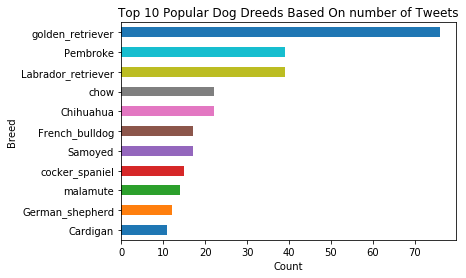

In [63]:
# Plot bar chart for top 10 popular breeds based on number of posts

twitter_archive_enhanced_Master.breed.value_counts()[10::-1].plot(kind = 'barh', title = 'Top 10 Popular Dog Dreeds Based On number of Tweets')
plt.xlabel('Count')
plt.ylabel('Breed');

 # Visual 3  
 
 Define: scatter btw retweet and favorite

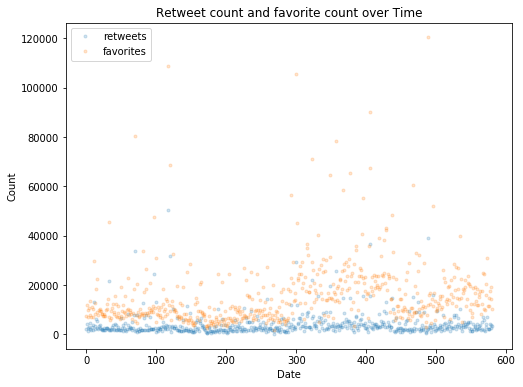

In [64]:
#plot a scatter btw retweet and favorite 

twitter_archive_enhanced_Master.plot.line(y =['retweets', 'favorites'], style = '.', alpha = .2, figsize=(8,6))
plt.title('Retweet count and favorite count over Time')
plt.xlabel('Date')
plt.ylabel('Count');

 # Visual 4 
 
Define:  Average ratings for popular dog breeds based on tweet count

In [65]:
# Make a list of top popular dog breeds based on number of tweets

top_tweet_count = twitter_archive_enhanced_Master.breed.value_counts().sort_values(ascending=False).nlargest(10).rename_axis('dog_breed').reset_index(name='tweet_counts')
breed_list = top_tweet_count.dog_breed.tolist()


# Average rating for top breeds based on number of tweets
avg_rating = twitter_archive_enhanced_Master.groupby('breed').rating_numerator.mean().sort_values(ascending=False).rename_axis('breed').reset_index(name='avg_rating')
breed_avg_rating = avg_rating[avg_rating['breed'].isin(breed_list)]

breed_avg_rating

,breed,avg_rating
15,Samoyed,12.647059
28,Pembroke,12.307692
29,French_bulldog,12.294118
32,cocker_spaniel,12.200000
35,Chihuahua,12.136364
36,chow,12.136364
40,Labrador_retriever,12.076923
63,golden_retriever,11.986842
67,German_shepherd,11.750000
69,malamute,11.714286


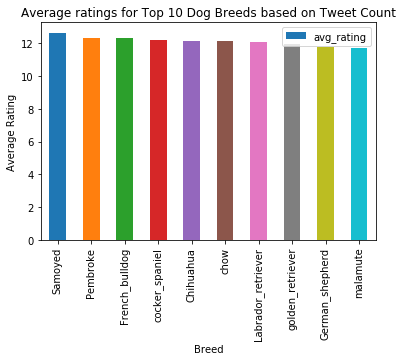

In [66]:
# Plot chart
breed_avg_rating.plot(kind='bar', x='breed', y='avg_rating')  
plt.title('Average ratings for Top 10 Dog Breeds based on Tweet Count')
plt.ylabel("Average Rating")
plt.xlabel("Breed");